In [1]:
import pandas as pd
import os

# Define the folder and file name
folder = 'Datasets'
file_name = '0202-2018-present.csv'
csv_file = os.path.join(folder, file_name)

# Define the columns you want to transform into rows, excluding "SubGrup proced" and "Total"
columns_to_transform = [f"{month}/{year}" for year in range(2018, 2024) for month in ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]]

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file, sep=';', encoding='utf-8')

# Drop the "SubGrup proced" and "Total" columns
df.drop(columns=['SubGrup proced', 'Total'], inplace=True, errors='ignore')

# Melt the DataFrame to convert columns to rows
melted_df = pd.melt(df, var_name='Month/Year', value_name='Value')

# Save the transformed data to a new CSV file
melted_df.to_csv(os.path.join(folder, 'transformed_data.csv'), index=False)


In [2]:
import pandas as pd
import os

# Define the folder and file name for the CSV file
folder = 'Datasets'
file_name_2 = '0202-2012-2017.csv'

# Generate the list of columns to transform using list comprehension
columns_to_transform = [f"{month}/{year}" for year in range(2012, 2018) for month in ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]]

# Read the columns from the CSV file
df2 = pd.read_csv(os.path.join(folder, file_name_2), usecols=columns_to_transform, sep=';', encoding='utf-8')

# Melt the DataFrame to convert columns to rows
melted_df2 = pd.melt(df2, var_name='Month/Year', value_name='Value')

# Save the transformed data to a new CSV file
melted_df2.to_csv(os.path.join(folder, 'transformed_data_2012_2017.csv'), index=False)

In [3]:
import pandas as pd

# Read both CSV files into DataFrames
df_2012_2017 = pd.read_csv('Datasets/transformed_data_2012_2017.csv')
df_2018_2023 = pd.read_csv('Datasets/transformed_data_2018_2023.csv')

# Concatenate the two DataFrames vertically (along rows)
combined_df = pd.concat([df_2012_2017, df_2018_2023], ignore_index=True)

# Save the merged data to a new CSV file
combined_df.to_csv('Datasets/merged_data.csv', index=False)


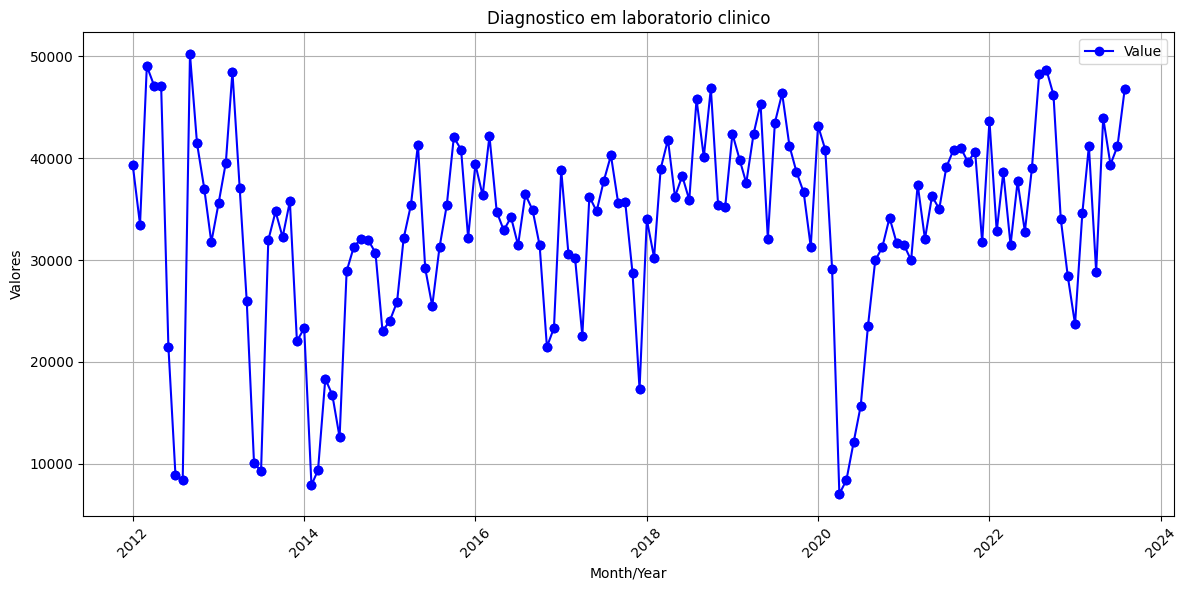

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folder where "merged_data.csv" is located
folder = 'Datasets'
file_name = 'merged_data.csv'

# Read the merged data into a DataFrame
merged_data = pd.read_csv(os.path.join(folder, file_name))

# Define a mapping from Portuguese to English month abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

# Convert the "Month/Year" column to a datetime format using the custom mapping
merged_data['Month/Year'] = merged_data['Month/Year'].replace(month_mapping, regex=True)
merged_data['Month/Year'] = pd.to_datetime(merged_data['Month/Year'], format='%b/%Y')

# Sort the DataFrame by the "Month/Year" column
merged_data = merged_data.sort_values(by='Month/Year')

# Extract the x (dates) and y (values) values for the line plot
x = merged_data['Month/Year']
y = merged_data['Value']

# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Value')
plt.xlabel('Month/Year')
plt.ylabel('Valores')
plt.title('Diagnostico em laboratorio clinico')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure that labels and titles fit within the plot
plt.show()
